In [219]:
import numpy as np
import networkx as nx
from util_richer import dataFromGraph
import torch

In [201]:
all_g = []
all_lens = []
all_es = []
beta=0.65
alpha=0.3
L=None
n = 12
for j in range(20000):
    g = nx.waxman_graph(n=n, beta=beta, alpha=alpha, L=L, domain=(0, 0, 1, 1), metric=None, seed=None)
    comp = max(nx.connected_components(g), key=len)
    sg = nx.subgraph(g, comp)
    if len(sg) >= 5:
        all_lens.append(len(sg))
        all_g.append(dataFromGraph(sg))
        all_es.append(len(sg.edges))

torch.save(all_g, 'rand_data.pt')

In [220]:
all_g = torch.load('rand_data.pt')

In [228]:
padded_all_g = []
for j in all_g:
    new_x = torch.zeros(12, 3)
    new_x[:j.x.size(0), :2] = j.x
    new_x[:j.x.size(0), 2] = 1
    padded_all_g.append(Data(x=new_x, edge_index=j.edge_index, edge_attr=torch.ones(j.edge_index.size(1))))

In [229]:
torch.save(padded_all_g, 'rand_data_padded.pt') 
# padded data is to ensure data is 12 nodes per graph, but filled with empty nodes.
# Also, add one more dim in node feature corresponding for existence of the node.

0.2133262823902697


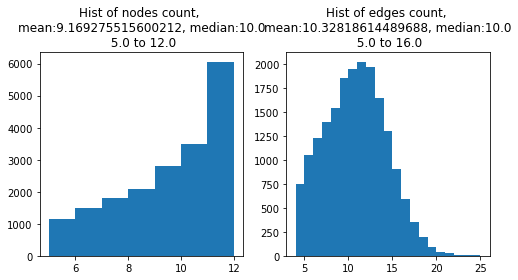

In [205]:
%matplotlib inline
pts = 5
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(7,4))
ax[0].hist(all_lens, bins=range(min(all_lens), max(all_lens)+1))
ax[1].hist(all_es, bins=range(min(all_es), max(all_es)+1))
ax[0].set_title(f'Hist of nodes count, \nmean:{np.mean(all_lens)}, median:{np.median(all_lens)}\n {np.percentile(all_lens, pts)} to {np.percentile(all_lens, 100-pts)}')
ax[1].set_title(f'Hist of edges count, \nmean:{np.mean(all_es)}, median:{np.median(all_es)}\n {np.percentile(all_es, pts)} to {np.percentile(all_es, 100-pts)}')
print (np.mean([all_lens[j] > all_es[j] for j in range(len(all_lens))]))
fig.tight_layout()